In [6]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, Dropout

In [7]:
import zipfile

In [8]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [9]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown


In [10]:
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [11]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [12]:
def process(image, label):
  image = tf.cast(image/255. , tf.float32)
  return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [13]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', padding='valid', input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu', padding='valid'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', padding='valid'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))
model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(84, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │    13,824,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            85 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,927,617 (53.13 MB)

 Trainable params: 13,927,617 (53.13 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [15]:
r = model.fit(train_ds, validation_data=validation_ds, epochs=10)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 72ms/step - accuracy: 0.5935 - loss: 0.6784 - val_accuracy: 0.7476 - val_loss: 0.5211
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 72s 67ms/step - accuracy: 0.7592 - loss: 0.4963 - val_accuracy: 0.7844 - val_loss: 0.4580
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 43s 69ms/step - accuracy: 0.8266 - loss: 0.3905 - val_accuracy: 0.7900 - val_loss: 0.4952
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 86s 75ms/step - accuracy: 0.8810 - loss: 0.2791 - val_accuracy: 0.7774 - val_loss: 0.5762
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 47s 75ms/step - accuracy: 0.9347 - loss: 0.1736 - val_accuracy: 0.7850 - val_loss: 0.8427
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 75ms/step - accuracy: 0.9541 - loss: 0.1205 - val_accuracy: 0.7816 - val_loss: 0.7757
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 75ms/step - accuracy: 0.9695 - loss: 0.0827 - val_accuracy: 0.7930 - val_loss: 0.9480
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 77s 68ms/step - accuracy: 0.9746 - loss: 0.0724 - 

In [17]:
test_loss, test_acc = model.evaluate(validation_ds)
print(test_acc)
print(test_loss)

157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - accuracy: 0.7997 - loss: 1.1097
0.8009999990463257
1.1118117570877075


**Updating the Hyperparameters- Model 2**

In [25]:
model2 = Sequential()
model2.add(Conv2D(32, kernel_size=(3,3), activation='relu', padding='valid', input_shape=(256,256,3)))
model2.add(MaxPooling2D(pool_size=(2,2), strides=2))
model2.add(Conv2D(64, kernel_size=(3,3), activation='relu', padding='valid'))
model2.add(MaxPooling2D(pool_size=(2,2), strides=2))
model2.add(Conv2D(128, kernel_size=(3,3), activation='relu', padding='valid'))
model2.add(MaxPooling2D(pool_size=(2,2), strides=2))
model2.add(Flatten())
model2.add(Dense(120, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(84, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

model2.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 120)            │    13,824,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            85 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,927,617 (53.13 MB)

 Trainable params: 13,927,617 (53.13 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [21]:
r2 = model2.fit(train_ds, validation_data = validation_ds, epochs=10)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 69ms/step - accuracy: 0.5372 - loss: 0.7044 - val_accuracy: 0.6158 - val_loss: 0.6453
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 43s 69ms/step - accuracy: 0.6698 - loss: 0.6121 - val_accuracy: 0.7580 - val_loss: 0.4982
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 85s 75ms/step - accuracy: 0.7610 - loss: 0.4916 - val_accuracy: 0.7644 - val_loss: 0.5077
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 77s 68ms/step - accuracy: 0.8178 - loss: 0.4000 - val_accuracy: 0.7914 - val_loss: 0.4383
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 43s 69ms/step - accuracy: 0.8629 - loss: 0.3172 - val_accuracy: 0.8018 - val_loss: 0.5105
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 47s 75ms/step - accuracy: 0.9009 - loss: 0.2410 - val_accuracy: 0.8064 - val_loss: 0.5274
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 47s 75ms/step - accuracy: 0.9288 - loss: 0.1755 - val_accuracy: 0.7754 - val_loss: 0.6027
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 69ms/step - accuracy: 0.9466 - loss: 0.1461 - 

In [22]:
test_loss, test_acc2 = model2.evaluate(validation_ds)
print(test_acc2)
print(test_loss)


157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - accuracy: 0.7953 - loss: 0.7299
0.7990000247955322
0.7405767440795898


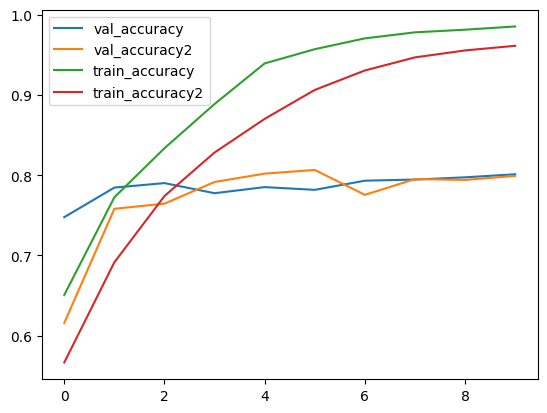

In [24]:
import matplotlib.pyplot as plt

plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.plot(r2.history['val_accuracy'], label='val_accuracy2')
plt.plot(r.history['accuracy'], label='train_accuracy')
plt.plot(r2.history['accuracy'], label='train_accuracy2')
plt.legend()
plt.show()

**Updating the hyperparamters- Model 3**

In [26]:
model3 = Sequential()
model3.add(Conv2D(32, kernel_size=(3,3), activation='relu', padding='same', input_shape=(256,256,3)))
model3.add(MaxPooling2D(pool_size=(2,2), strides=2))
model3.add(Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))
model3.add(MaxPooling2D(pool_size=(2,2), strides=2))
model3.add(Conv2D(128, kernel_size=(3,3), activation='relu', padding='same'))
model3.add(MaxPooling2D(pool_size=(2,2), strides=2))
model3.add(Flatten())
model3.add(Dense(120, activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(84, activation='relu'))
model3.add(Dense(1, activation='sigmoid'))

model3.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 128, 128, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 131072)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 120)            │    15,728,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            85 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,832,257 (60.40 MB)

 Trainable params: 15,832,257 (60.40 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
model3.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [28]:
r3 = model3.fit(train_ds, validation_data=validation_ds, epochs=10)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 74ms/step - accuracy: 0.6205 - loss: 0.6438 - val_accuracy: 0.7592 - val_loss: 0.4922
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 47s 74ms/step - accuracy: 0.7578 - loss: 0.5005 - val_accuracy: 0.7918 - val_loss: 0.4712
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 43s 69ms/step - accuracy: 0.8152 - loss: 0.4045 - val_accuracy: 0.7964 - val_loss: 0.4918
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 70ms/step - accuracy: 0.8804 - loss: 0.2828 - val_accuracy: 0.7872 - val_loss: 0.6522
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 77ms/step - accuracy: 0.9225 - loss: 0.1942 - val_accuracy: 0.7834 - val_loss: 0.7084
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 77ms/step - accuracy: 0.9505 - loss: 0.1312 - val_accuracy: 0.7878 - val_loss: 0.8735
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 77ms/step - accuracy: 0.9650 - loss: 0.0951 - val_accuracy: 0.7832 - val_loss: 0.8652
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 77s 70ms/step - accuracy: 0.9757 - loss: 0.0714 - 

In [29]:
test_acc3 = model3.evaluate(validation_ds)

157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - accuracy: 0.7793 - loss: 1.0759


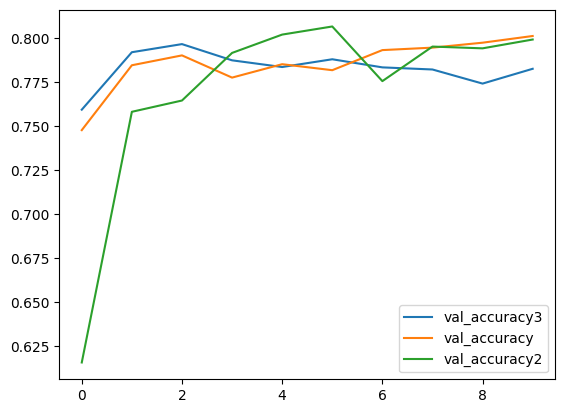

In [30]:
plt.plot(r3.history['val_accuracy'], label='val_accuracy3')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.plot(r2.history['val_accuracy'], label='val_accuracy2')
plt.legend()
plt.show()